In [1]:
!pip install yfinance
import yfinance as yf



import plotly.graph_objs as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
from datetime import datetime

In [3]:
start = datetime(2014,9,17)
end =datetime.now().date().isoformat()
symbol ='BTC-USD'


In [4]:
df = yf.download(symbol,start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df.to_csv('coin.csv')

In [7]:
data = pd.read_csv('coin.csv')
print(df.dtypes)
#print("\n*** DF ***")
data_copy = df.copy()
data_copy.head()
print(data)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2975  2022-11-09  18543.761719  18590.458984  15682.692383  15880.780273   
2976  2022-11-10  15883.158203  18054.312500  15834.018555  17586.771484   
2977  2022-11-11  17583.251953  17650.943359  16543.482422  17034.292969   
2978  2022-11-12  17036.875000  17066.675781  16651.775391  16799.185547   
2979  2022-11-13  16799.

In [8]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
data_test = data[data['Date']< '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672


In [10]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [12]:
#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732344e-02, 1.29013200e-02, 1.49400699e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293979e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [13]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
 X_train.append(training_data[i-60:i])
 Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape
print(X_train.shape)

(1872, 60, 5)


In [14]:
print( X_train.shape, Y_train.shape )

(1872, 60, 5) (1872,)


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [24]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))

In [25]:
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

In [26]:
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

In [27]:
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [29]:
X_train = np.stack(X_train, axis=0) 

In [30]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 10s 172ms/step - loss: 0.0177 - val_loss: 0.0200
Epoch 2/20
34/34 [==============================] - 5s 157ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 3/20
34/34 [==============================] - 5s 157ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 4/20
34/34 [==============================] - 6s 173ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 5/20
34/34 [==============================] - 5s 158ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 6/20
34/34 [==============================] - 5s 157ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 7/20
34/34 [==============================] - 5s 156ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 8/20
34/34 [==============================] - 5s 156ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 9/20
34/34 [==============================] - 5s 158ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 10/20
34/34 [==============================] - 5s 159ms/step - loss: 0.0027 - val_loss: 0.003

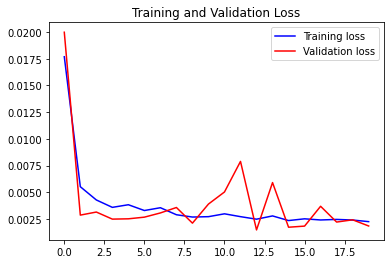

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()